<a href="https://colab.research.google.com/github/agustinrodcastelar/Sistema-de-recomendacion/blob/main/Sprint_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SISTEMA DE RECOMENDACIÓN**
**| Sprint 03 - Bertero, Buraschi y Rodriguez**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

**Base de datos**

In [ ]:
ratings  = pd.read_csv('/content/drive/MyDrive/archivos/u.data',sep='\t', header=None)                  #importación base de datos ("limpia" con los ajustes de lectura necesarios)
ratings.columns = ['user_id', 'item_id', 'rating', 'timestamp']
ratings

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
from datetime import datetime

In [ ]:
ratings["timestamp"] = pd.to_datetime(ratings['timestamp'], format='%Y/%m/%d')           #se covierte variable 'timestamp' con formato 'Y/m/d'
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,1970-01-01 00:00:00.881250949
1,186,302,3,1970-01-01 00:00:00.891717742
2,22,377,1,1970-01-01 00:00:00.878887116
3,244,51,2,1970-01-01 00:00:00.880606923
4,166,346,1,1970-01-01 00:00:00.886397596


In [ ]:
plot_df = ratings.copy()
plot_df["year"] = ratings.timestamp.dt.year
plot_df = plot_df.groupby("year", as_index=False).count()[["year", "user_id"]]
plot_df.columns = ["year", "reviews_count"]
plot_df.head()

,year,reviews_count
0,1970,100000


In [ ]:
#Bases de datos para TEST y TRAIN
ratings_test = pd.read_csv('/content/drive/MyDrive/archivos/ua.test', sep='\t', names=ratings.columns, encoding='latin-1')
ratings_base  = pd.read_csv('/content/drive/MyDrive/archivos/ua.base',sep='\t', names=ratings.columns, encoding='latin-1')


In [ ]:
ratings_test["timestamp"] = pd.to_datetime(ratings_test['timestamp'], format='%Y/%m/%d')
ratings_test.head()

,user_id,item_id,rating,timestamp
0,1,20,4,1970-01-01 00:00:00.887431883
1,1,33,4,1970-01-01 00:00:00.878542699
2,1,61,4,1970-01-01 00:00:00.878542420
3,1,117,3,1970-01-01 00:00:00.874965739
4,1,155,2,1970-01-01 00:00:00.878542201


In [ ]:
ratings_base["timestamp"] = pd.to_datetime(ratings_base['timestamp'], format='%Y/%m/%d')
ratings_base.head()

,user_id,item_id,rating,timestamp
0,1,1,5,1970-01-01 00:00:00.874965758
1,1,2,3,1970-01-01 00:00:00.876893171
2,1,3,4,1970-01-01 00:00:00.878542960
3,1,4,3,1970-01-01 00:00:00.876893119
4,1,5,3,1970-01-01 00:00:00.889751712


In [ ]:
ratings_base.shape

(90570, 4)

In [ ]:
ratings_base.user_id.nunique()

943

In [ ]:
ratings_test.shape

(9430, 4)

In [ ]:
ratings_test.user_id.nunique()

943

In [ ]:
#Se busca usuarios que estén en el set de test y NO en el de train: COLD START

In [ ]:
ratings_test[~ratings_test.user_id.isin(ratings_base.user_id.unique())].user_id.nunique()

0

In [ ]:
#interacciones  para el set de train y test con variables de referencia: "user_id", "item_id", "rating"

In [ ]:
matrix_columns = ["user_id", "item_id", "rating"]

In [ ]:
interactions = ratings_base[matrix_columns]
interactions.head()

,user_id,item_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3


In [ ]:
interactions_test = ratings_test[matrix_columns]
interactions_test.head()

,user_id,item_id,rating
0,1,20,4
1,1,33,4
2,1,61,4
3,1,117,3
4,1,155,2


In [ ]:
interactions_matrix = interactions.pivot(index="user_id", columns="item_id", values="rating")
interactions_matrix.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
interactions_test_matrix = interactions.pivot(index="user_id", columns="item_id", values="rating")
interactions_test_matrix.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
interactions_matrix.shape

(943, 1680)

In [ ]:
interactions_test_matrix.shape

(943, 1680)

In [ ]:
interactions_matrix.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

In [ ]:
interactions_test_matrix.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
interactions_matrix_csr = csr_matrix(interactions_matrix.values)                              #interacciones con formato csr_matrix
interactions_test_matrix_csr = csr_matrix(interactions_test_matrix.values)

In [ ]:
user_ids = list(interactions_matrix.index)
user_dict = {}
counter = 0
for i in user_ids:
    user_dict[i] = counter
    counter += 1

In [ ]:
user_ids_test = list(interactions_test_matrix.index)
user_dict_test = {}
counter = 0
for i in user_ids_test:
    user_dict_test[i] = counter
    counter += 1

In [ ]:
user_dict

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [ ]:
user_dict_test

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [ ]:
item_id = list(interactions_matrix.index)
item_dict = {}
counter = 0
for i in item_id:
    item_dict[i] = counter
    counter += 1

In [ ]:
item_id_test = list(interactions_test_matrix.index)
item_dict_test = {}
counter = 0
for i in item_id:
    item_dict_test[i] = counter
    counter += 1

In [ ]:
item_id

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [ ]:
item_id_test

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

**Modelización**

In [ ]:
pip install lightfm

In [ ]:
from lightfm import LightFM

model = LightFM(no_components=3, random_state=100, learning_rate=0.03)

In [ ]:
import numpy as np

nan_mask = np.isnan(interactions_matrix_csr.data)         #se verifica si existen "NANs"
if np.any(nan_mask):
      interactions_matrix_csr.data[nan_mask] = 0         #se reemplaza NANs con 0 u otro valor apropiado


inf_mask = np.isinf(interactions_matrix_csr.data)        #se reemplaza valores infinitos con 0 u otro valor apropiado
if np.any(inf_mask):
    interactions_matrix_csr.data[inf_mask] = 0

model = model.fit(interactions_matrix_csr, epochs=10)    #modelo

In [ ]:
#Generaciones de recomendaciones para cada usuario

In [ ]:
from tqdm import tqdm

In [ ]:
import numpy as np
#definimos dict donde se va a ir almacenando las recomendaciones
recomms_dict = {
    'user_id': [],
    'recomms': []
}

#se obtiene cantidad de usuarios y cantidad de items
n_users, n_items = interactions_matrix.shape
item_ids = np.arange(n_items)

#por cada usuario del dataset de test, se generan recomendaciones
for user in tqdm(ratings_test.user_id.unique()):
    # Validar si el usuario se encuentra en la matriz de interacciones (interactions_matrix.index) del data usuado para train
    if user in list(interactions_matrix.index):
      # Si el usuario esta en train -no es cold start, se usa el modelo para recomendar
      user_x = user_dict[user] #se busca el indice del usuario en la matriz (transformamos id a indice)

      # Generar las predicciones para el usuario x
      preds = model.predict(user_ids=user_x, item_ids = item_ids)

      #Se ordenann las predicciones de menor a mayor y quedarse con 50.
      scores = pd.Series(preds)
      scores.index = interactions_matrix.columns
      scores = list(pd.Series(scores.sort_values(ascending=False).index))[:50]

      #Se obtiene listado de contenidos vistos anteriormente por el usuario (en el set de train)
      watched_contents = ratings_base[ratings_base.user_id == user].item_id.unique()

      #Se filtra los contenidos ya vistos y quedarse con los primeros 20 (según consigna)
      recomms = [x for x in scores if x not in watched_contents][:20]

      # Se guardan las recomendaciones en el diccionario creado
      recomms_dict['user_id'].append(user)
      recomms_dict['recomms'].append(scores)



100%|██████████| 943/943 [00:03<00:00, 289.81it/s]


In [ ]:
recomms_df = pd.DataFrame(recomms_dict)         #se convierte en df el diccionario creado
recomms_df

,user_id,recomms
0,1,"[50, 174, 181, 172, 98, 204, 56, 210, 79, 168,..."
1,2,"[286, 300, 258, 288, 294, 302, 313, 748, 100, ..."
2,3,"[286, 300, 288, 258, 294, 302, 328, 748, 313, ..."
3,4,"[286, 300, 258, 288, 294, 302, 100, 313, 748, ..."
4,5,"[174, 50, 181, 172, 98, 204, 56, 210, 79, 168,..."
...,...,...
938,939,"[286, 258, 294, 288, 300, 50, 100, 181, 1, 313..."
939,940,"[50, 181, 100, 174, 1, 121, 258, 98, 294, 56, ..."
940,941,"[286, 258, 288, 294, 300, 50, 100, 1, 302, 313..."
941,942,"[50, 181, 100, 1, 258, 121, 174, 294, 286, 288..."


In [ ]:
recomms_df.user_id.nunique()

943

In [ ]:
import numpy as np

In [ ]:
def recomm(model, interactions, user_id, user_dict, item_dict, nrec_items = 10, show = True):

    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]

    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))

    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                [interactions.loc[user_id,:] > 0].index).sort_values(ascending=False))

    #Filtro de items que ya leyó el usuario
    scores = [x for x in scores if x not in known_items]
    recomms = scores[0:nrec_items]

    if show == True:
        print ("User: " + str(user_id))
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + str(i))
            counter+=1

        print("\n Recommended Items:")

        counter = 1
        for i in recomms:
            print(str(counter) + '- ' + str(i))
            counter+=1
    return recomms

In [ ]:
recomms_test = recomm(model, interactions_matrix, user_x, user_dict, item_dict, show=True)

User: 942
Known Likes:
1- 1221
2- 1204
3- 1050
4- 1028
5- 969
6- 945
7- 892
8- 879
9- 878
10- 750
11- 705
12- 689
13- 678
14- 662
15- 661
16- 659
17- 607
18- 539
19- 528
20- 520
21- 514
22- 511
23- 500
24- 498
25- 496
26- 484
27- 480
28- 479
29- 478
30- 435
31- 414
32- 362
33- 357
34- 347
35- 328
36- 322
37- 318
38- 316
39- 315
40- 313
41- 310
42- 304
43- 303
44- 300
45- 282
46- 272
47- 269
48- 265
49- 259
50- 258
51- 234
52- 216
53- 215
54- 210
55- 197
56- 193
57- 183
58- 174
59- 172
60- 135
61- 131
62- 124
63- 99
64- 97
65- 95
66- 79
67- 71
68- 50
69- 31

 Recommended Items:
1- 181
2- 100
3- 1
4- 121
5- 294
6- 286
7- 288
8- 127
9- 98
10- 7


In [ ]:
recomms_test

[181, 100, 1, 121, 294, 286, 288, 127, 98, 7]

**Base de datos con la descripción de cada película según item_id**

In [ ]:
items_cols = ['item_id' , 'movie_title' , 'release_date' , 'video_release_date' , 'IMDb_URL' , 'unknown|' , 'Action|' , 'Adventure|', 'Animation|', "Children's|", 'Comedy|', 'Crime|', 'Documentary|', 'Drama|',\
              'Fantasy|', 'Film-Noir|', 'Horror|', 'Musical|', 'Mystery|', 'Romance|', 'Sci-Fi|', 'Thriller|', \
              'War|', 'Western|']
movies = pd.read_csv('/content/drive/MyDrive/archivos/u.item', sep='|', encoding='latin-1', names=items_cols, parse_dates=True, index_col='item_id')
movies

,movie_title,release_date,video_release_date,IMDb_URL,unknown|,Action|,Adventure|,Animation|,Children's|,Comedy|,...,Fantasy|,Film-Noir|,Horror|,Musical|,Mystery|,Romance|,Sci-Fi|,Thriller|,War|,Western|
item_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
data = pd.merge(ratings,movies,on = 'item_id')      #se compatibiliza la base de datos "ratings" con el nombre de la película según item_id
data.head()

,user_id,item_id,rating,timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown|,Action|,...,Fantasy|,Film-Noir|,Horror|,Musical|,Mystery|,Romance|,Sci-Fi|,Thriller|,War|,Western|
0,196,242,3,1970-01-01 00:00:00.881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,1970-01-01 00:00:00.875747190,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,1970-01-01 00:00:00.883888671,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,1970-01-01 00:00:00.879138235,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,1970-01-01 00:00:00.876503793,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
columns= ['movie_title' ]                   #Nueva base generada con sólo dos variables item_id y movie_title
movies= movies [columns]
movies

,movie_title
item_id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)
...,...
1678,Mat' i syn (1997)
1679,B. Monkey (1998)
1680,Sliding Doors (1998)


In [ ]:
#METRICAS

In [ ]:
#En primera instancia, se generan las recomendaciones para cada tipo de usuario (identificación)

In [ ]:
cold_start_recomms = interactions \
    .groupby("item_id") \
    .agg({"rating": "mean"}) \
    .sort_values(by="rating", ascending=False) \
    .head(10) \
    .index \
    .to_list()

In [ ]:
users = interactions.user_id.unique()

In [ ]:
recomms_dict = {
    "user_id": [],
    "recomms": [],

}

for user in users:

  # Recomms personalizadas
  if user in users:
    user_recomms = recomm(model, interactions_matrix, user, user_dict, item_dict, nrec_items = 10, show = False)
    recomms_dict["user_id"].append(user)
    recomms_dict["recomms"].append(user_recomms)



In [ ]:
recomms_df = pd.DataFrame(recomms_dict)

In [ ]:
recomms_df.head()

,user_id,recomms
0,1,"[423, 202, 655, 318, 357, 568, 405, 117, 265, ..."
1,2,"[748, 328, 50, 323, 245, 333, 268, 322, 181, 7]"
2,3,"[286, 294, 328, 748, 313, 269, 245, 323, 301, ..."
3,4,"[286, 288, 294, 302, 100, 313, 748, 269, 50, 245]"
4,5,"[98, 56, 195, 22, 96, 202, 1, 82, 238, 191]"


In [ ]:
interactions_test.head()

,user_id,item_id,rating
0,1,20,4
1,1,33,4
2,1,61,4
3,1,117,3
4,1,155,2


In [ ]:
ideal_recomms = interactions_test\
                  .sort_values(by=["user_id", "rating"], ascending=False)\
                  .groupby(["user_id"], as_index=False)\
                  .head()
ideal_recomms.head()

,user_id,item_id,rating
9423,943,186,5
9424,943,215,5
9420,943,11,4
9421,943,58,4
9422,943,111,4


In [ ]:
#MAP

In [ ]:
#df_map = ideal_recomms.merge(recomms_df, how="left", left_on="user_id",right_on="user_id")[["user_id", "item_id", "recomms"]]
#df_map.columns = ["user_id", "ideal", "recomms"]
#df_map

In [ ]:
#aps = [] # lista vacía para ir almacenando la AP de cada recomendación

#for pred, label in df_map[["ideal", "recomms"]].values:
#  n = len(pred) # cantidad de elementos recomendados
#arange = np.arange(n, dtype=np.int32) + 1. # indexamos en base 1
 # rel_k = np.in1d(pred[:n], label) # lista de booleanos que indican la relevancia de cada ítem
#  tp = np.ones(rel_k.sum(), dtype=np.int32).cumsum() # lista con el contador de verdaderos positivos
 # denom = arange[rel_k] # posiciones donde se encuentran los ítems relantes
#  ap = (tp / denom).sum() / len(label) # average precision
 # aps.append(ap)

In [ ]:
##MAP = np.mean(aps)
#print(f'mean average precision = {round(MAP, 5)}')

In [ ]:
##ANEXO##

<Axes: >

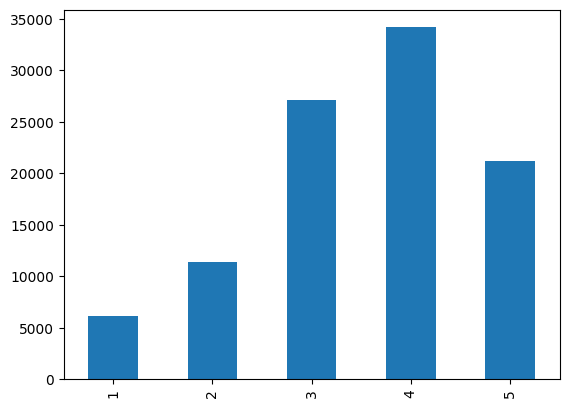

In [ ]:
ratings = ratings.rating
ratings.value_counts().sort_index().plot.bar()

In [ ]:
ratings.describe()


count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64